Firstly, I try to do an algorithm solving for a 2d space with only one solution (1 peak).

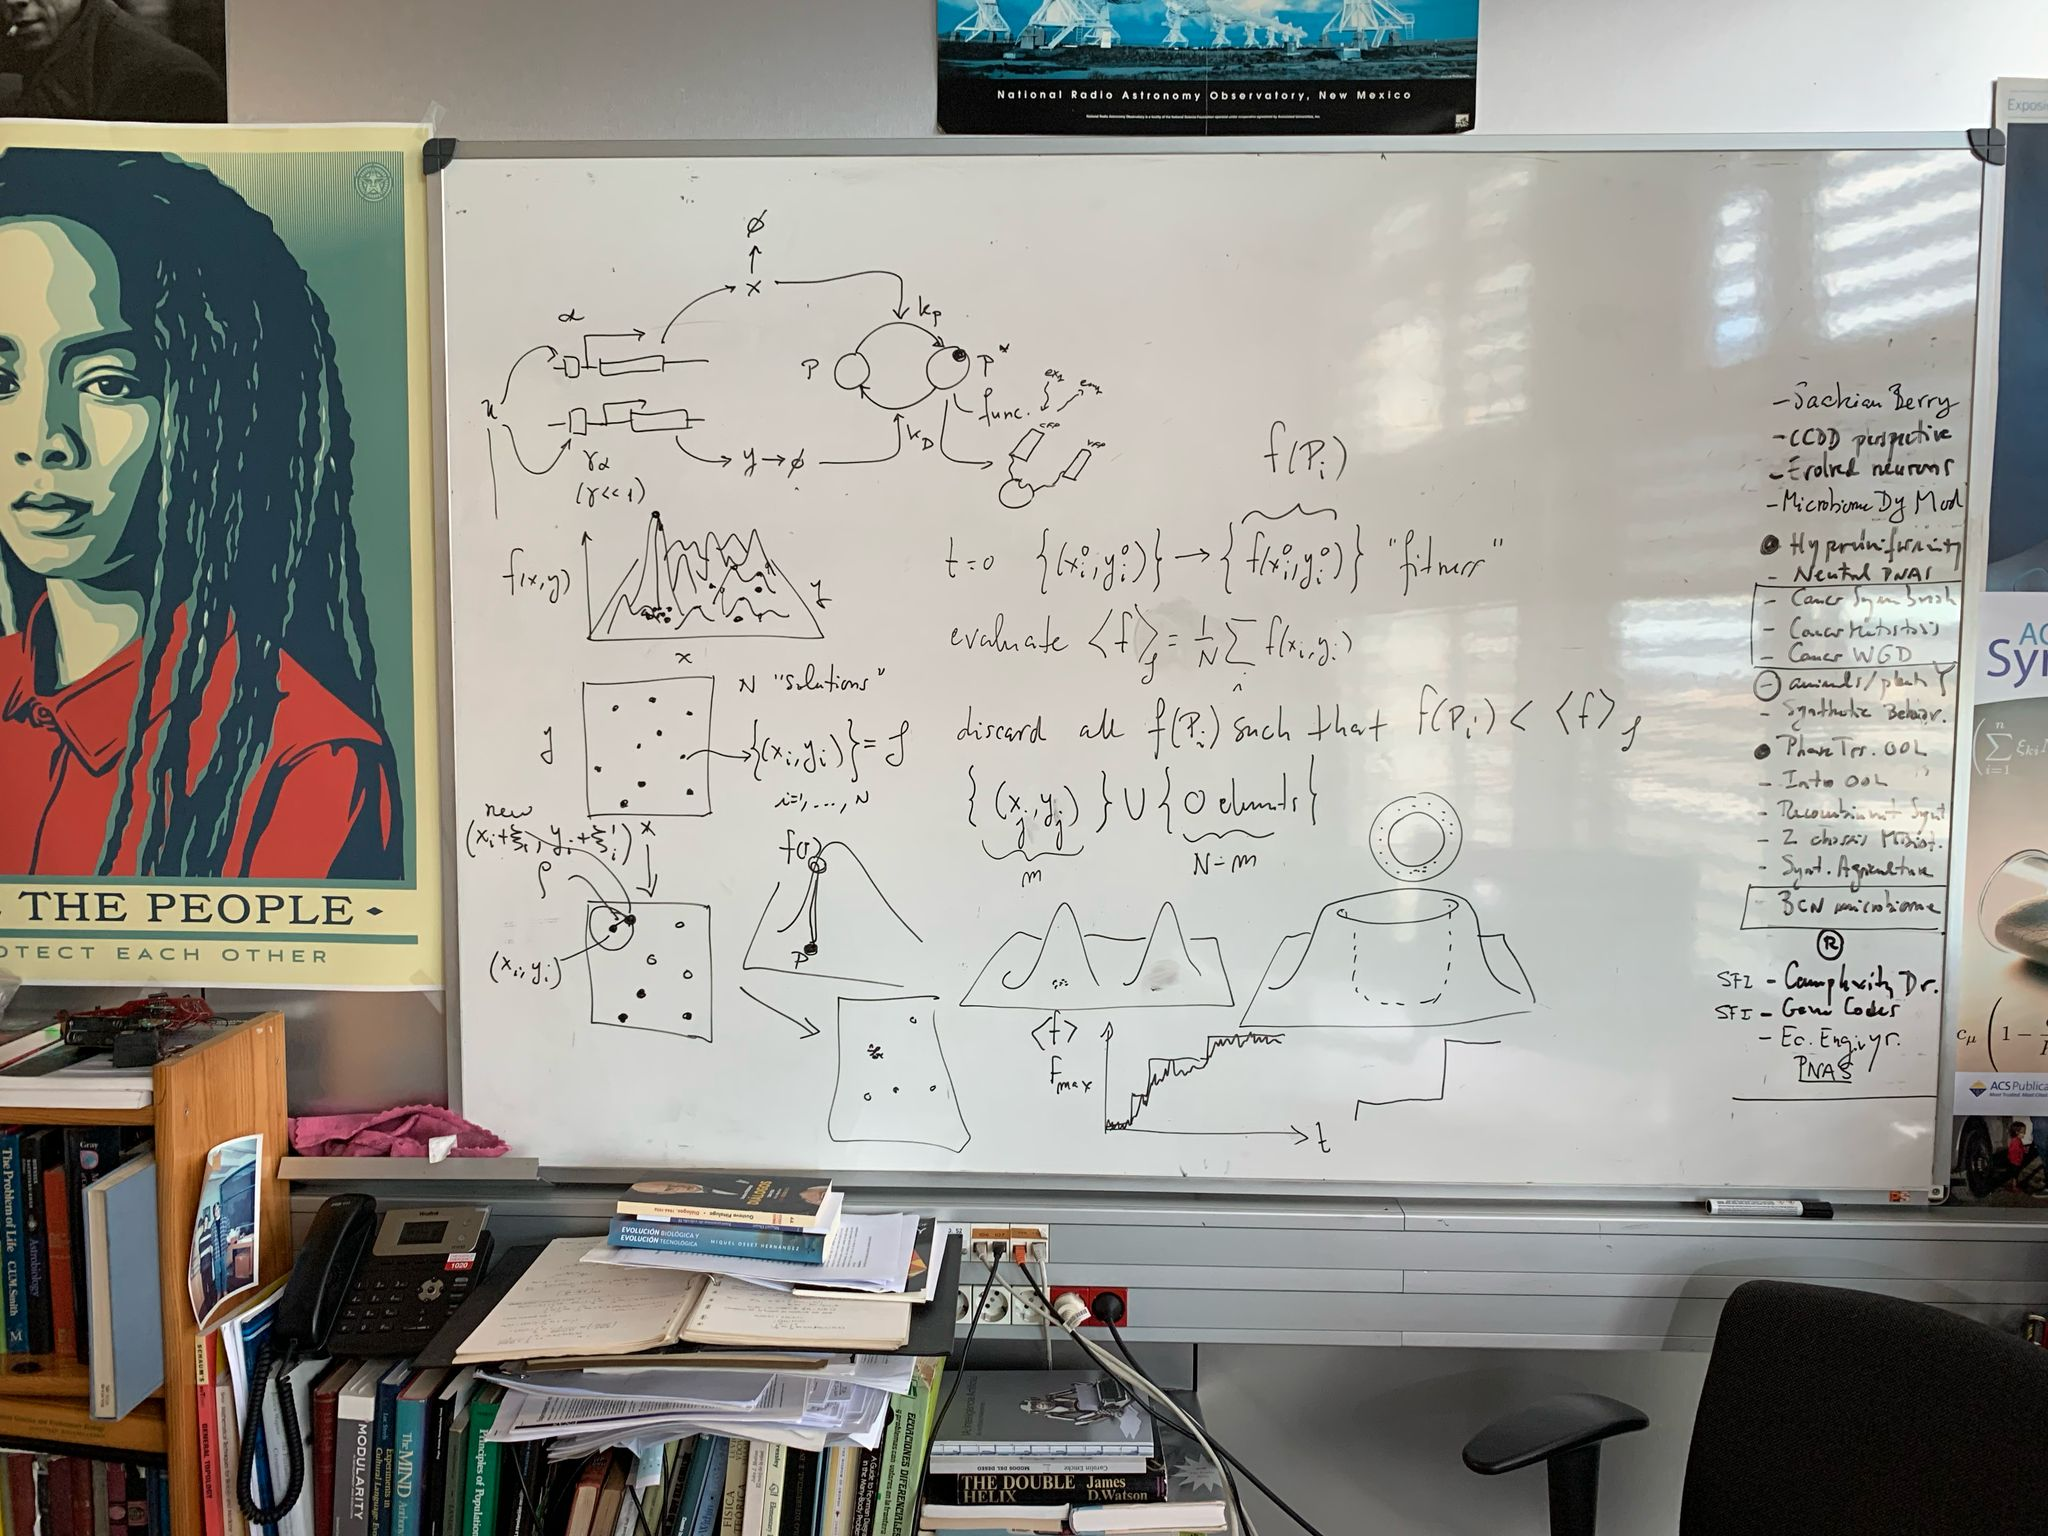

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm   # colormap
from matplotlib.ticker import LinearLocator     # for having ticks evenly spaced on the axis

In [2]:
# start by creating a 10x10 grid
N = 100

x = np.linspace(0,10,N)
y = np.linspace(0,10,N)
X,Y = np.meshgrid(x,y)

# fitness function
def f(x,y):
    return np.exp(-0.1*(x-5)**2-0.1*(y-5)**2)  # picco fatto con una gaussiana

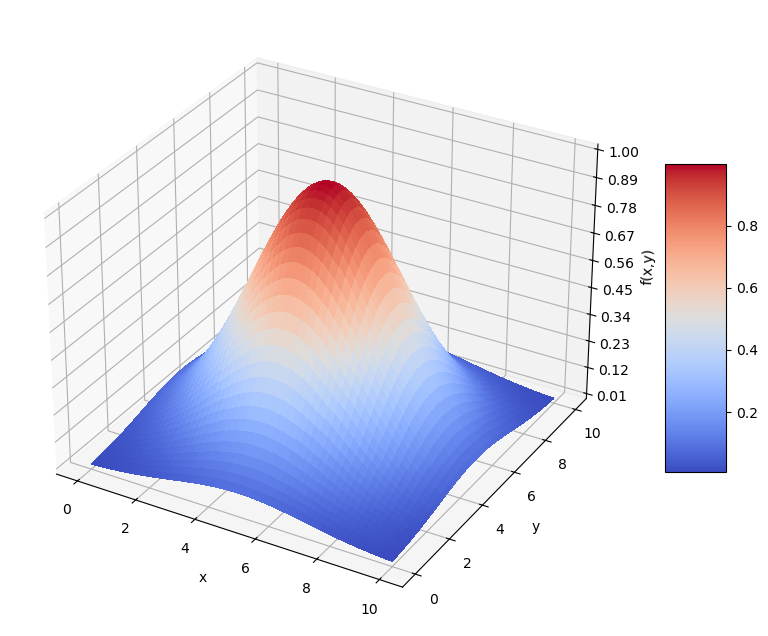

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8))
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Now I implement the basic EA algorithm

In [4]:
# generate the initial solutions set
#np.random.seed(12345)
N_sol = int(N/5)
idx = np.random.randint(0,N,N_sol,dtype=int)   # I start with N/5 uniformly distributed points, so not to add any starting bias to the search
idy = np.random.randint(0,N,N_sol,dtype=int)

# I quickly create a class so that I can have some utility methods here
class SolutionArray(np.ndarray):
    @property       # sol.x returns an array of all the x values of sol
    def x(self):
        return self[:, 0]

    @x.setter
    def x(self, value):
        self[:, 0] = value

    @property
    def y(self):
        return self[:, 1]

    @y.setter
    def y(self, value):
        self[:, 1] = value

sol = np.array([(xx, yy) for xx, yy in zip(X[idx, idx], Y[idy, idy])]).view(SolutionArray)

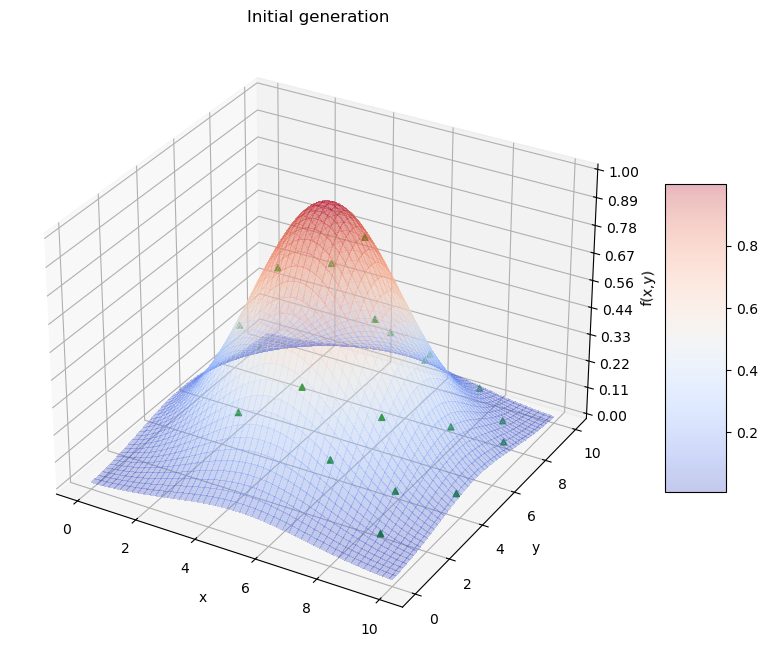

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8))
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=False,alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_zlim(0.0)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# add the generated (initial) solutions
ax.scatter(sol.x,sol.y,f(sol.x,sol.y),marker='^',c='g')

plt.title('Initial generation')
plt.show()

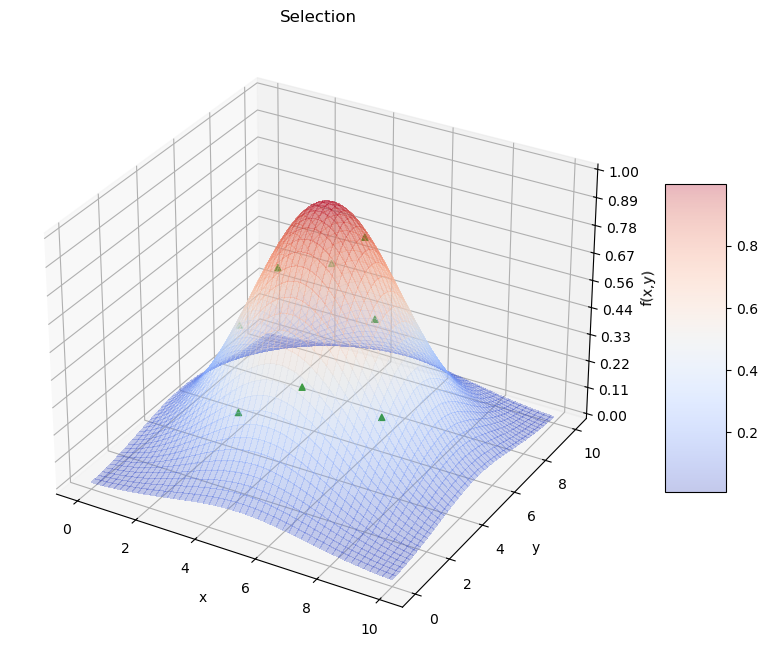

Mean before the selection:0.3055731191886871


In [6]:
# evaluate the mean over the set of solutions
running_mean = np.sum(f(sol.x,sol.y)) / N_sol

# discard elements in sol whose fitness value is below average
sol = sol[f(sol.x,sol.y) >= running_mean]


# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8))
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=False,alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_zlim(0.0)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# add the generated (initial) solutions
ax.scatter(sol.x,sol.y,f(sol.x,sol.y),marker='^',c='g')

plt.title('Selection')
plt.show()

print(f'Mean before the selection:{running_mean}')

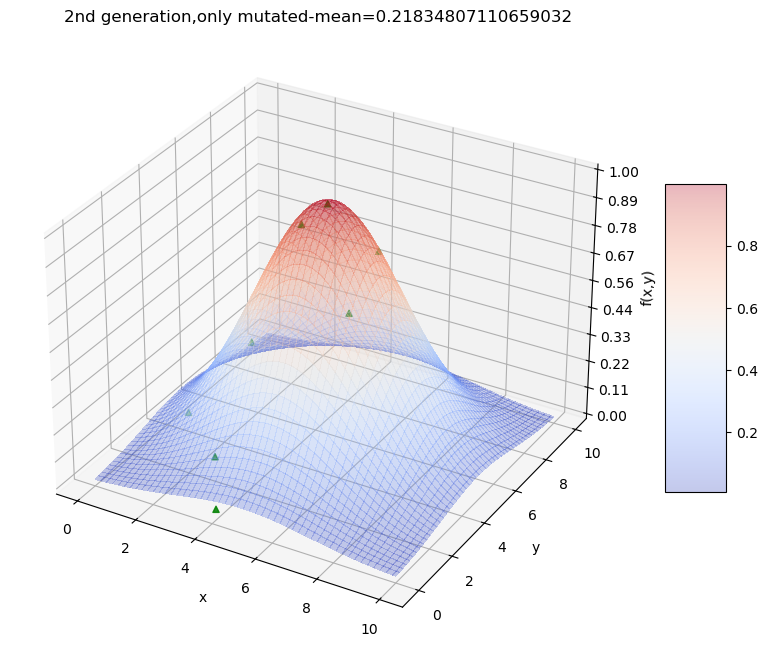

In [7]:
# generate the mutation radius 
mutation_radius_x = np.random.uniform(-max(x)/4, max(x)/4, len(sol))
mutation_radius_y = np.random.uniform(-max(y)/4, max(y)/4, len(sol))

# mutate
sol.x = sol.x + mutation_radius_x
sol.y = sol.y + mutation_radius_y

mean_mutated = np.sum(f(sol.x,sol.y)) / N_sol

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8))
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=False,alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_zlim(0.0)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# add the generated (initial) solutions
ax.scatter(sol.x,sol.y,f(sol.x,sol.y),marker='^',c='g')

plt.title(f'2nd generation,only mutated-mean={mean_mutated}')
plt.show()

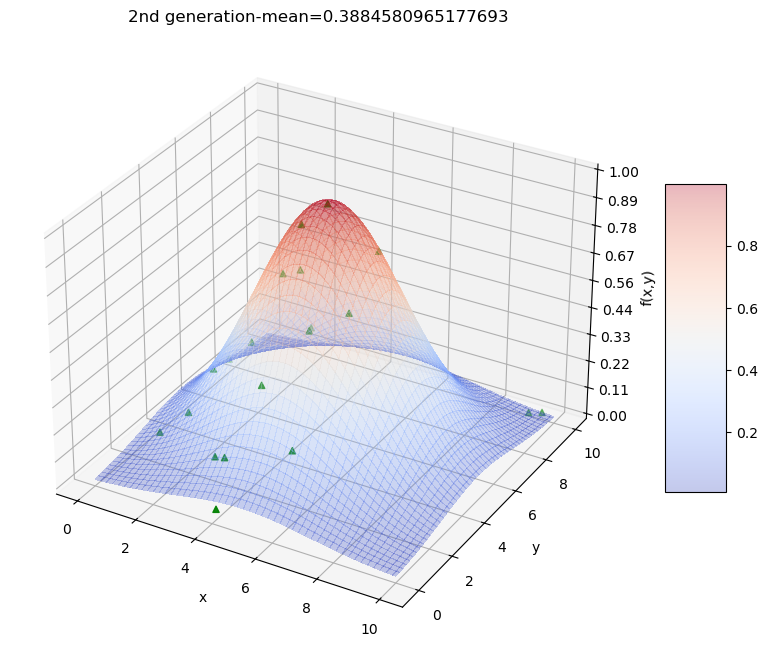

In [8]:
# generate the remaining at random
remaining_x = x[np.random.randint(0, N, N_sol - len(sol))]
remaining_y = y[np.random.randint(0, N, N_sol - len(sol))]
remaining = np.array([[xx,yy] for xx,yy in zip(remaining_x,remaining_y)])

sol = np.concatenate([sol,remaining]).view(SolutionArray)

mean = np.sum(f(sol.x,sol.y)) / N_sol

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8))
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=False,alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_zlim(0.0)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# add the generated (initial) solutions
ax.scatter(sol.x,sol.y,f(sol.x,sol.y),marker='^',c='g')

plt.title(f'2nd generation-mean={mean}')
plt.show()